In [1]:
from __future__ import division, print_function, unicode_literals
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings('ignore')

In [2]:
N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes

X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

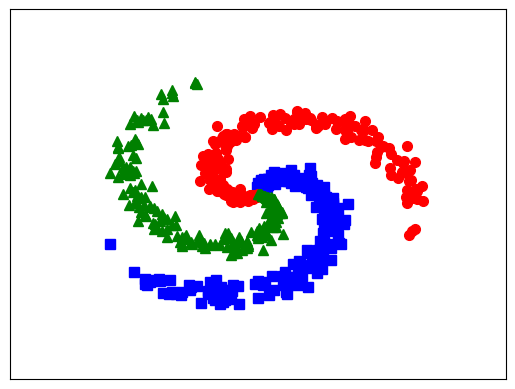

In [3]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [4]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    
    return Z

In [5]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [6]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [7]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
    
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098650
iter 1000, loss: 0.370318
iter 2000, loss: 0.063816
iter 3000, loss: 0.041175
iter 4000, loss: 0.031104
iter 5000, loss: 0.025970
iter 6000, loss: 0.022811
iter 7000, loss: 0.020668
iter 8000, loss: 0.019092
iter 9000, loss: 0.017872


In [8]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
100


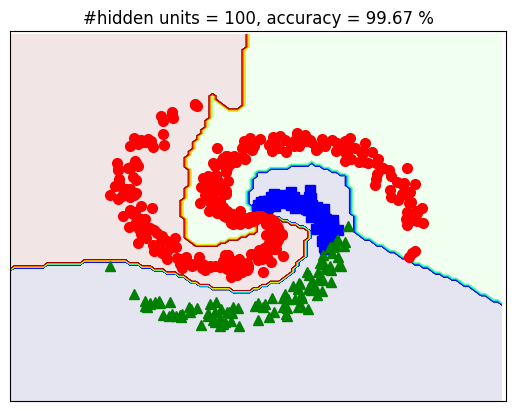

In [9]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 100
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

**Bài tập ứng dụng 1.**

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

df = pd.concat([data, pd.DataFrame(iris.target, columns=['label'])], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df_setosa = df[df['label'] == 0]
df_versicolor = df[df['label'] == 1]
df_virginica = df[df['label'] == 2]

In [14]:
X_setosa = df_setosa.drop('label', axis=1)
y_setosa = df_setosa['label']

X_versicolor = df_versicolor.drop('label', axis=1)
y_versicolor = df_versicolor['label']

X_virginica = df_virginica.drop('label', axis=1)
y_virginica = df_virginica['label']

In [15]:
X_train = pd.concat([X_setosa[:40], X_versicolor[:40], X_virginica[:40]], axis=0)
y_train = pd.concat([y_setosa[:40], y_versicolor[:40], y_virginica[:40]], axis=0)

X_test = pd.concat([X_setosa[40:], X_versicolor[40:], X_virginica[40:]], axis=0)
y_test = pd.concat([y_setosa[40:], y_versicolor[40:], y_virginica[40:]], axis=0)


In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)


In [17]:
d0 = X_train.shape[1]
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y_train, C)
N = X_train.T.shape[1]
eta = 0.1 # learning rate

start_time = time.time()

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

training_time = time.time() - start_time
print(f"\nTraining Time: %f s" % training_time)

iter 0, loss: 1.098225
iter 1000, loss: 0.090235
iter 2000, loss: 0.075985
iter 3000, loss: 0.069840
iter 4000, loss: 0.066320
iter 5000, loss: 0.063956
iter 6000, loss: 0.062170
iter 7000, loss: 0.061082
iter 8000, loss: 0.059796
iter 9000, loss: 0.058504

Training Time: 0.792166 s


In [21]:
num_runs = 10
prediction_times = []

for _ in range(num_runs):
    start_time = time.time()
    
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)

avg_prediction_time = np.mean(prediction_times)
print(Z2)
print(f"\nAverage Predict Time: %f s" % avg_prediction_time)

[[ 2.15648058e+01  1.98468363e+01  2.02742418e+01  1.92204089e+01
   2.16300431e+01  2.12345733e+01  1.97602996e+01  2.08070180e+01
   1.85905885e+01  2.03632374e+01  2.23929320e+01  2.01144674e+01
   2.01962461e+01  2.00905322e+01  2.48648958e+01  2.37402620e+01
   2.24159730e+01  2.10171388e+01  2.21142037e+01  2.15133016e+01
   2.10085149e+01  2.07017970e+01  2.20170415e+01  1.82641175e+01
   1.91730621e+01  1.94465449e+01  1.94067855e+01  2.14680562e+01
   2.14995686e+01  1.93873071e+01  1.93208404e+01  2.05051963e+01
   2.35987486e+01  2.42060701e+01  1.98153553e+01  2.11653927e+01
   2.26545571e+01  2.19791098e+01  1.91507657e+01  2.10056160e+01
  -4.15434130e+00 -5.02151863e+00 -6.85794785e+00 -5.34537140e+00
  -6.96115026e+00 -6.08615345e+00 -6.96333654e+00  8.45871988e-01
  -4.55825666e+00 -4.71242170e+00 -1.69730080e+00 -4.93794730e+00
  -2.01793214e+00 -7.05290966e+00 -4.39778526e-01 -3.30003872e+00
  -7.34515460e+00 -1.11072037e+00 -9.12278193e+00 -1.96091722e+00
  -1.05599

In [22]:
print("Accuracy", accuracy_score(y_train, predicted_class))
print("Precision", precision_score(y_train, predicted_class, average='weighted'))
print("Recall", recall_score(y_train, predicted_class, average='weighted'))

Accuracy 0.9833333333333333
Precision 0.9833333333333333
Recall 0.9833333333333333


In [24]:
d0 = X_test.shape[1]
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y_test, C)
N = X_test.T.shape[1]
eta = 0.1 # learning rate

start_time = time.time()

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_test.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_test.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

training_time = time.time() - start_time
print(f"\nTraining Time: %f s" % training_time)

iter 0, loss: 1.098838
iter 1000, loss: 0.006609
iter 2000, loss: 0.002614
iter 3000, loss: 0.001561
iter 4000, loss: 0.001092
iter 5000, loss: 0.000831
iter 6000, loss: 0.000666
iter 7000, loss: 0.000554
iter 8000, loss: 0.000472
iter 9000, loss: 0.000410

Training Time: 1.483426 s


In [25]:
num_runs = 10
prediction_times = []

for _ in range(num_runs):
    start_time = time.time()
    
    Z1 = np.dot(W1.T, X_test.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)

avg_prediction_time = np.mean(prediction_times)
print(Z2)
print(f"\nAverage Predict Time: %f s" % avg_prediction_time)

[[ 27.31905762  19.77471836  24.74603716  22.60490875  24.7588702
   24.02837778  28.58492862  25.15243291  29.21741656  26.94952624
   -8.06361695  -7.4075035   -4.00914155  -1.18261487  -6.82992384
   -3.62979113  -5.34758454  -4.22339179   1.34108708  -5.16793282
  -23.59809569 -18.01750866 -19.67640642 -23.71250963 -24.38549501
  -20.05131107 -18.19331061 -17.30632115 -21.15911712 -16.47649715]
 [ 15.90417991  12.43603319  14.45639999  14.30768654  15.4284689
   14.32669477  16.634996    14.70021099  16.98764647  15.71158857
    6.81311669   7.77406543   8.0478509    7.66753603   7.15085669
    8.36255781   7.76950725   8.62549967   8.36392079   7.71842813
    3.75888967   5.33646977   3.82140441   4.08578937   3.63074493
    4.56593609   4.57690962   5.32135246   4.06936481   5.03518104]
 [-43.02730214 -32.06853174 -39.0254679  -36.74698903 -40.00724435
  -38.18446114 -45.01528404 -39.67293154 -45.99584923 -42.46838482
    1.2281672   -0.3821349   -4.03695273  -6.46955129  -0.3356

In [26]:
print("Accuracy", accuracy_score(y_test, predicted_class))
print("Precision", precision_score(y_test, predicted_class, average='weighted'))
print("Recall", recall_score(y_test, predicted_class, average='weighted'))

Accuracy 1.0
Precision 1.0
Recall 1.0


In [27]:
logR = LogisticRegression(multi_class='multinomial')
nb = GaussianNB()

In [28]:
start_time = time.time()

logR.fit(X_train, y_train)

training_time = time.time() - start_time
print("Training Time: %f s" % training_time)


num_runs = 10
prediction_times = []

for _ in range(num_runs):
    start_time = time.time()
    y_pred = logR.predict(X_test)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)
    
avg_prediction_time = np.mean(prediction_times)
print("Average Predict Time: %f s" % avg_prediction_time)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred, average='weighted'))

Training Time: 0.029102 s
Average Predict Time: 0.000515 s
Accuracy 1.0
Precision 1.0
Recall 1.0


In [29]:
start_time = time.time()

nb.fit(X_train, y_train)

training_time = time.time() - start_time
print("Training Time: %f s" % training_time)


num_runs = 10
prediction_times = []

for _ in range(num_runs):
    start_time = time.time()
    y_pred = nb.predict(X_test)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)
    
avg_prediction_time = np.mean(prediction_times)
print("Average Predict Time: %f s" % avg_prediction_time)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall", recall_score(y_test, y_pred, average='weighted'))

Training Time: 0.001000 s
Average Predict Time: 0.000451 s
Accuracy 1.0
Precision 1.0
Recall 1.0


In [30]:
d0 = X_train.shape[1]
d1 = h = 75 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y_train, C)
N = X_train.T.shape[1]
eta = 0.1 # learning rate

start_time = time.time()

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

training_time = time.time() - start_time
print(f"\nTraining Time: %f s" % training_time)

iter 0, loss: 1.098974
iter 1000, loss: 0.093581
iter 2000, loss: 0.077564
iter 3000, loss: 0.071046
iter 4000, loss: 0.067433
iter 5000, loss: 0.065192
iter 6000, loss: 0.063660
iter 7000, loss: 0.062520
iter 8000, loss: 0.061607
iter 9000, loss: 0.060784

Training Time: 0.709808 s


In [31]:
d0 = X_train.shape[1]
d1 = h = 50 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y_train, C)
N = X_train.T.shape[1]
eta = 0.1 # learning rate

start_time = time.time()

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train.T) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train.T, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

training_time = time.time() - start_time
print(f"\nTraining Time: %f s" % training_time)

iter 0, loss: 1.099876
iter 1000, loss: 0.090618
iter 2000, loss: 0.076204
iter 3000, loss: 0.070181
iter 4000, loss: 0.066731
iter 5000, loss: 0.064540
iter 6000, loss: 0.063030
iter 7000, loss: 0.061935
iter 8000, loss: 0.061009
iter 9000, loss: 0.060200

Training Time: 0.558233 s
